In [1259]:
pwd

'c:\\Users\\FAUZAN\\OneDrive\\Desktop\\ML_USING_PYTHON'

In [1260]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [1261]:
df=pd.read_csv("House_Price.csv",header=0)

In [1262]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347,0
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146,1
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,NaN,38,YES,0.045764,0
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151,1
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474,0


In [1263]:
print(df.columns)

Index(['price', 'crime_rate', 'resid_area', 'air_qual', 'room_num', 'age',
       'dist1', 'dist2', 'dist3', 'dist4', 'teachers', 'poor_prop', 'airport',
       'n_hos_beds', 'n_hot_rooms', 'waterbody', 'rainfall', 'bus_ter',
       'parks', 'Sold'],
      dtype='object')


In [1264]:
print(df.dtypes[df.dtypes == 'object'])


airport      object
waterbody    object
bus_ter      object
dtype: object


In [1265]:
df.drop(columns=['airport', 'waterbody', 'bus_ter'], inplace=True)


In [1266]:
print(df.columns)


Index(['price', 'crime_rate', 'resid_area', 'air_qual', 'room_num', 'age',
       'dist1', 'dist2', 'dist3', 'dist4', 'teachers', 'poor_prop',
       'n_hos_beds', 'n_hot_rooms', 'rainfall', 'parks', 'Sold'],
      dtype='object')


In [1267]:
print(df.dtypes)


price          float64
crime_rate     float64
resid_area     float64
air_qual       float64
room_num       float64
age            float64
dist1          float64
dist2          float64
dist3          float64
dist4          float64
teachers       float64
poor_prop      float64
n_hos_beds     float64
n_hot_rooms    float64
rainfall         int64
parks          float64
Sold             int64
dtype: object


In [1268]:
df.dropna(inplace=True)


In [1269]:
print(df["Sold"])  # Prints as a Pandas Series


0      0
1      1
2      0
3      1
4      0
      ..
501    1
502    0
503    1
504    0
505    1
Name: Sold, Length: 498, dtype: int64


In [1270]:
X=df[['price']]

In [1271]:
y=df[['Sold']]

In [1272]:
X.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [1273]:
y.head()

,Sold
0,0
1,1
2,0
3,1
4,0


In [1274]:
from sklearn.linear_model import LogisticRegression

In [1275]:
clf_lrs=LogisticRegression()

In [1276]:
clf_lrs.fit(X,y)

c:\Users\FAUZAN\miniconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [1277]:
clf_lrs.coef_

array([[0.00236513]])

In [1278]:
clf_lrs.intercept_

array([-0.0453675])

In [1279]:
# using stastt model 
# fisrt add constatnt term

In [1280]:
import statsmodels.api as sn

In [1281]:
X_cons=sn.add_constant(X)

In [1282]:
X_cons.head()

,const,price
0,1.0,24.0
1,1.0,21.6
2,1.0,34.7
3,1.0,33.4
4,1.0,36.2


In [1283]:
import statsmodels.discrete.discrete_model as sm

In [1284]:
logit=sm.Logit(y,X_cons).fit()

Optimization terminated successfully.
         Current function value: 0.693080
         Iterations 3


In [1285]:
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Sold   No. Observations:                  498
Model:                          Logit   Df Residuals:                      496
Method:                           MLE   Df Model:                            1
Date:                Tue, 25 Mar 2025   Pseudo R-squ.:               8.503e-05
Time:                        16:25:56   Log-Likelihood:                -345.15
converged:                       True   LL-Null:                       -345.18
Covariance Type:            nonrobust   LLR p-value:                    0.8086
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0454      0.238     -0.191      0.849      -0.512       0.421
price          0.0024      0.010      0.242      0.809      -0.017       0.022
==============================================================================
"""

In [1286]:
# using multiplt predictor for logistic regression

In [1287]:
X=df.loc[:,df.columns != 'Sold']

In [1288]:
y=df['Sold']

In [1289]:
clf_lrs=LogisticRegression()


In [1290]:
clf_lrs.fit(X, y)


c:\Users\FAUZAN\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [1291]:
clf_lrs.coef_

array([[-0.01372991, -0.0144206 , -0.00490369,  0.03920761,  0.0846375 ,
         0.00078683, -0.04663738,  0.13548876, -0.45131637,  0.3370349 ,
        -0.0056846 , -0.01169503,  0.06326794,  0.00082004,  0.00217383,
         0.0204649 ]])

In [1292]:
clf_lrs.intercept_

array([-0.09932146])

In [1293]:
X_cons=sn.add_constant(X)

In [1294]:
logit=sm.Logit(y,X_cons).fit()

Optimization terminated successfully.
         Current function value: 0.685879
         Iterations 4


In [1295]:
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Sold   No. Observations:                  498
Model:                          Logit   Df Residuals:                      481
Method:                           MLE   Df Model:                           16
Date:                Tue, 25 Mar 2025   Pseudo R-squ.:                 0.01047
Time:                        16:25:57   Log-Likelihood:                -341.57
converged:                       True   LL-Null:                       -345.18
Covariance Type:            nonrobust   LLR p-value:                    0.9685
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.2362      2.112     -0.585      0.558      -5.376       2.903
price          -0.0166      0.019     -0.891      0.373      -0.053       0.020
crime_rate     -0.0151      0.013     -1.159      0.247      -0.041       0.010
resid_area     -0.0025      0.023     -0.107      0.915      -0.048       0.043
air_qual       -1.4967      2.357     -0.635      0.525      -6.116       3.123
room_num        0.1398      0.191      0.731      0.465      -0.235       0.515
age             0.0007      0.006      0.124      0.901      -0.010       0.012
dist1          -0.0045      0.762     -0.006      0.995      -1.498       1.489
dist2           0.6679      0.812      0.822      0.411      -0.924       2.260
dist3          -0.9643      0.797     -1.211      0.226      -2.526       0.597
dist4           0.2972      0.425      0.699      0.484      -0.536       1.130
teachers        0.0066      0.052      0.127      0.899      -0.095       0.108
poor_prop      -0.0104      0.024     -0.440      0.660      -0.057       0.036
n_hos_beds      0.0858      0.063      1.364      0.173      -0.038       0.209
n_hot_rooms     0.0019      0.017      0.107      0.915      -0.032       0.036
rainfall        0.0022      0.007      0.302      0.763      -0.012       0.017
parks          22.3867     21.358      1.048      0.295     -19.474      64.248
===============================================================================
"""

In [1296]:
clf_lrs.predict_proba(X)


array([[0.49297334, 0.50702666],
       [0.45571227, 0.54428773],
       [0.44634298, 0.55365702],
       [0.44732187, 0.55267813],
       [0.49458264, 0.50541736],
       [0.48516859, 0.51483141],
       [0.5293231 , 0.4706769 ],
       [0.55888214, 0.44111786],
       [0.55987514, 0.44012486],
       [0.49417686, 0.50582314],
       [0.5539127 , 0.4460873 ],
       [0.48498033, 0.51501967],
       [0.54239261, 0.45760739],
       [0.50296483, 0.49703517],
       [0.4340208 , 0.5659792 ],
       [0.4761148 , 0.5238852 ],
       [0.49289538, 0.50710462],
       [0.50711075, 0.49288925],
       [0.44135089, 0.55864911],
       [0.47691651, 0.52308349],
       [0.49476276, 0.50523724],
       [0.48394456, 0.51605544],
       [0.54499303, 0.45500697],
       [0.47653035, 0.52346965],
       [0.50808545, 0.49191455],
       [0.48349411, 0.51650589],
       [0.42238979, 0.57761021],
       [0.46068296, 0.53931704],
       [0.50426274, 0.49573726],
       [0.43670967, 0.56329033],
       [0.

In [1297]:
y_pred=clf_lrs.predict(X)

In [1298]:
y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,

In [1299]:
y_pred_03=(clf_lrs.predict_proba(X)[:,1]>=0.3)

In [1300]:
y_pred_03

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [1301]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y,y_pred)

array([[120, 128],
       [110, 140]])

In [1302]:
confusion_matrix(y,y_pred_03)

array([[  2, 246],
       [  0, 250]])

In [1303]:
#evalution of model

In [1304]:
from sklearn.metrics import precision_score,recall_score

In [1305]:
precision_score(y,y_pred)

0.5223880597014925

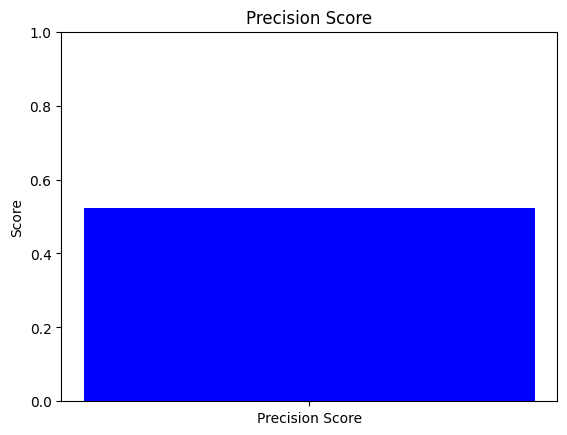

In [1306]:
import matplotlib.pyplot as plt
precision = precision_score(y, y_pred)
# Plotting
plt.bar(['Precision Score'], [precision], color='blue')
plt.ylabel('Score')
plt.title('Precision Score')
plt.ylim(0, 1)  # Precision ranges from 0 to 1
plt.show()

In [1307]:
recall_score(y,y_pred)

0.56

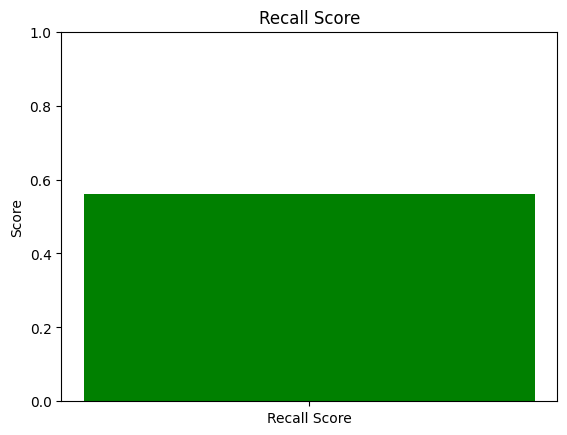

In [1308]:
recall = recall_score(y, y_pred)

# Plotting
plt.bar(['Recall Score'], [recall], color='green')
plt.ylabel('Score')
plt.title('Recall Score')
plt.ylim(0, 1)  # Recall ranges from 0 to 1
plt.show()

In [1309]:
from sklearn.metrics import roc_auc_score

In [1310]:
roc_auc_score(y,y_pred)

np.float64(0.5219354838709678)

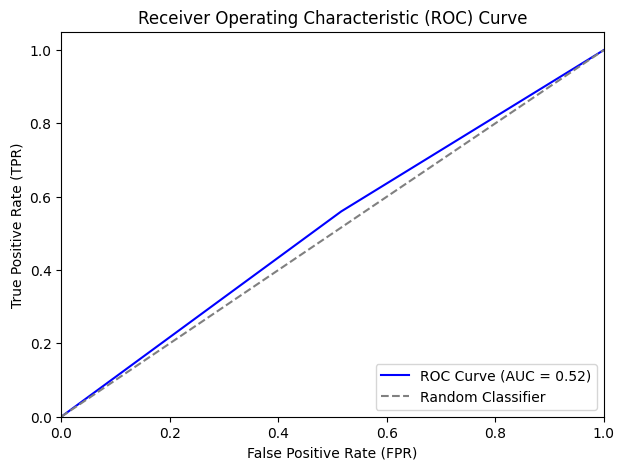

In [1312]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Computing False Positive Rate (FPR), True Positive Rate (TPR), and AUC score
fpr, tpr, _ = roc_curve(y, y_pred)
roc_auc = roc_auc_score(y, y_pred)

# Plotting the ROC Curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')  # Baseline
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
